In [81]:
## importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords 

In [82]:
## reading the dataset 

yelp = pd.read_csv("C:\\Users\\amres\\Desktop\\datasets\\yelp.csv")

In [83]:
# keeping log of description length

yelp['text_length'] = yelp['text'].apply(len)

In [84]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


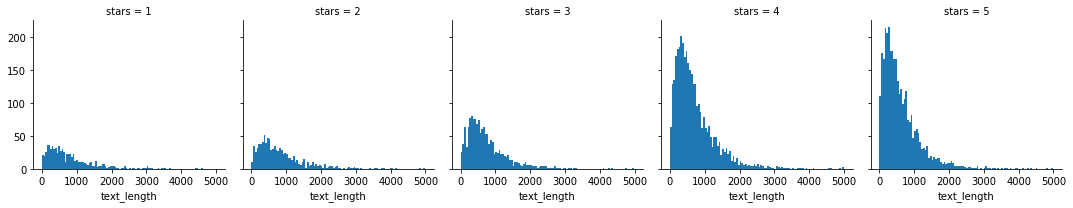

In [85]:
## visual analysis of the data to check for any pattern 

g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text_length', bins=100)

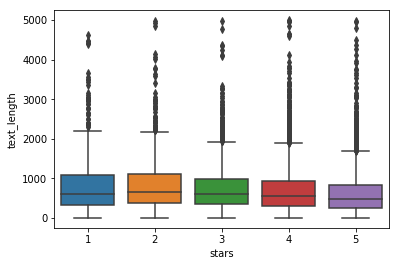

In [96]:
## using boxplot to visualise and find out outliers 

sns.boxplot(x='stars', y='text_length', data=yelp)

In [86]:
## checking for correlation for all variables 

stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


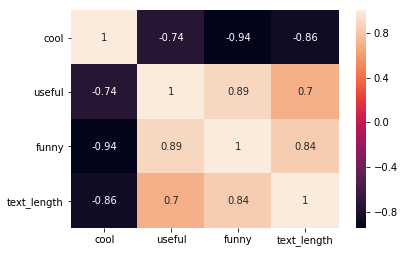

In [87]:
## visualising the correlation using plot

sns.heatmap(data=stars.corr(), annot=True)

In [88]:
## creating classes which we want to predict - having either 1 or 5 stars

yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]
yelp_class.shape

(4086, 11)

In [89]:
X = yelp_class['text']
y = yelp_class['stars']

In [90]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [91]:
## creating feature vector for classification 

import string 

def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [92]:
## convert into vector 

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
len(bow_transformer.vocabulary_)

26435

In [42]:
len(bow_transformer.vocabulary_)

26435

In [43]:
X = bow_transformer.transform(X)

In [63]:
## split the data for training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [93]:
## train the model using training data 

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [94]:
## make predictions using the test data 

preds = model.predict(X_test)

In [95]:
## check the accuracy of model

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[136  48]
 [ 27 811]]


             precision    recall  f1-score   support

          1       0.83      0.74      0.78       184
          5       0.94      0.97      0.96       838

avg / total       0.92      0.93      0.92      1022



<strong>The model has an accuracy of 92 % </strong>